<a href="https://colab.research.google.com/github/FarhanKhan1/100_days_DL/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/100_DAYS_OF_ML/placement.csv", index_col=0)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


<Axes: xlabel='cgpa', ylabel='iq'>

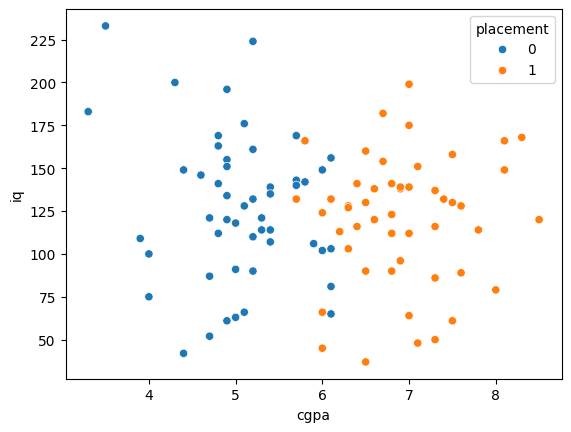

In [10]:
sns.scatterplot(x=df["cgpa"], y=df["iq"], hue=df['placement'])
#

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
p = Perceptron()

In [16]:
p.fit(x,y)

Perceptron()

In [17]:
p.coef_

array([[1218.5, -193. ]])

In [18]:
p.intercept_

array([-7.])

In [20]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

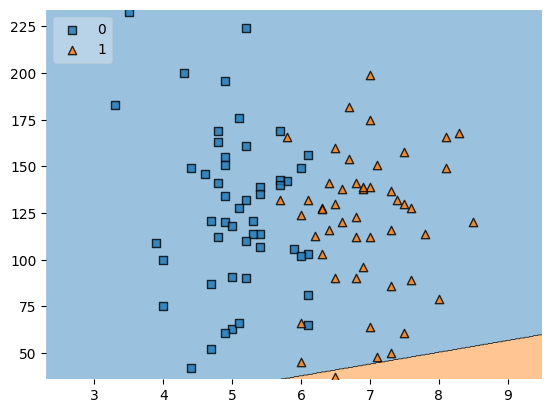

In [21]:
plot_decision_regions(x.values, y.values, clf=p, legend=2)

**Perceptron Trick**


In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

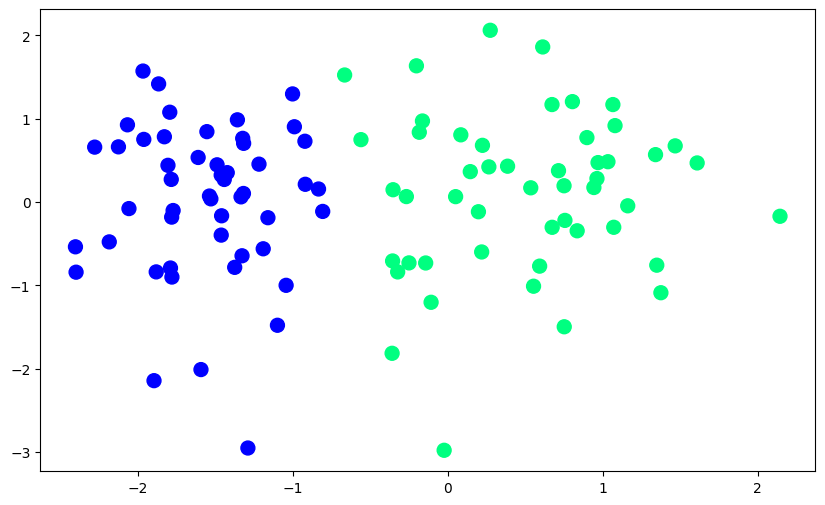

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print(intercept_)
print(coef_)

0.9
[1.2638211  0.22500797]


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

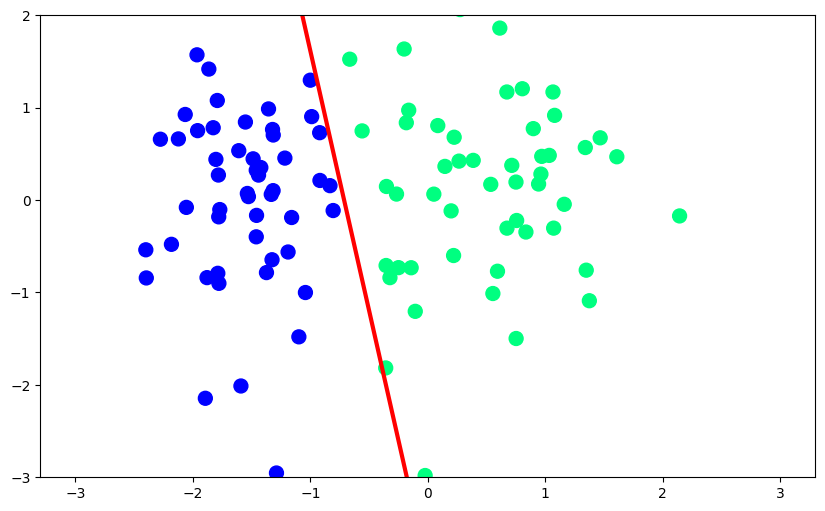

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)